#### Part 1 Instructions
#### Get the Weather Description and Amount of Precipitation for Each City

In [ ]:
import random
import numpy as np
import timeit
import pandas as pd
import matplotlib.pyplot as plt
import os
import time
from citipy import citipy
from datetime import datetime
from citipy import citipy
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
from scipy.stats import linregress

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
# coordinates

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

644

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # print(f"{i} {city}")
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # print(city_url)
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | ilulissat
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | lichuan
Processing Record 4 of Set 1 | carnarvon
Processing Record 5 of Set 1 | calabozo
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | lamont
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | kalabagh
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | salta
Processing Record 14 of Set 1 | merauke
Processing Record 15 of Set 1 | tepulco
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | karaul
City not found. Skipping...
Processing Record 18 of Set 1 | imeni poliny osipenko
Processing Record 19 of Set 1 | iqaluit
Processing Record 20 of Set 1 | samarai
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | attawapiskat
City not found. Skipping...
Processing 

Processing Record 39 of Set 4 | saint-georges
Processing Record 40 of Set 4 | baoqing
Processing Record 41 of Set 4 | bengkulu
Processing Record 42 of Set 4 | kupang
Processing Record 43 of Set 4 | meulaboh
Processing Record 44 of Set 4 | baruun-urt
Processing Record 45 of Set 4 | kushima
Processing Record 46 of Set 4 | rodrigues alves
Processing Record 47 of Set 4 | henties bay
Processing Record 48 of Set 4 | coquimbo
Processing Record 49 of Set 4 | husavik
Processing Record 50 of Set 4 | phan thiet
Processing Record 1 of Set 5 | havoysund
Processing Record 2 of Set 5 | opuwo
Processing Record 3 of Set 5 | egvekinot
Processing Record 4 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 5 of Set 5 | sao joao da barra
Processing Record 6 of Set 5 | ubala
Processing Record 7 of Set 5 | saint-philippe
Processing Record 8 of Set 5 | coos bay
Processing Record 9 of Set 5 | alenquer
Processing Record 10 of Set 5 | ndele
Processing Record 11 of Set 5 | ardistan
City not fo

Processing Record 29 of Set 8 | cortez
Processing Record 30 of Set 8 | luena
Processing Record 31 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 32 of Set 8 | lourdes
Processing Record 33 of Set 8 | iracoubo
Processing Record 34 of Set 8 | kavaratti
Processing Record 35 of Set 8 | itatinga
Processing Record 36 of Set 8 | caceres
Processing Record 37 of Set 8 | torres
Processing Record 38 of Set 8 | kabo
Processing Record 39 of Set 8 | phangnga
Processing Record 40 of Set 8 | buchanan
Processing Record 41 of Set 8 | mitsamiouli
Processing Record 42 of Set 8 | sladkovo
Processing Record 43 of Set 8 | saint-francois
Processing Record 44 of Set 8 | kattivakkam
Processing Record 45 of Set 8 | geraldton
Processing Record 46 of Set 8 | shache
Processing Record 47 of Set 8 | alotau
City not found. Skipping...
Processing Record 48 of Set 8 | jalu
Processing Record 49 of Set 8 | campana
Processing Record 50 of Set 8 | tiksi
Processing Record 1 of Set 9 | pithora
Processing Reco

Processing Record 20 of Set 12 | stawell
Processing Record 21 of Set 12 | smithers
Processing Record 22 of Set 12 | muriti
Processing Record 23 of Set 12 | acajutla
Processing Record 24 of Set 12 | sur
Processing Record 25 of Set 12 | ishinomaki
Processing Record 26 of Set 12 | kamenka
Processing Record 27 of Set 12 | wuwei
Processing Record 28 of Set 12 | bogdana
Processing Record 29 of Set 12 | russkaya polyana
Processing Record 30 of Set 12 | kathmandu
Processing Record 31 of Set 12 | limpio
Processing Record 32 of Set 12 | asyut
Processing Record 33 of Set 12 | russkiy
Processing Record 34 of Set 12 | la rioja
Processing Record 35 of Set 12 | uspenka
Processing Record 36 of Set 12 | la ronge
Processing Record 37 of Set 12 | cabedelo
Processing Record 38 of Set 12 | presidencia roque saenz pena
Processing Record 39 of Set 12 | ondarroa
Processing Record 40 of Set 12 | butembo
Processing Record 41 of Set 12 | anadyr
Processing Record 42 of Set 12 | sao jose de piranhas
Processing Rec

In [8]:
print(f"len of city_data: {len(city_data)}")

len of city_data: 598


In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ilulissat,69.22,-51.10,33.80,64,90,5.82,GL,2020-06-18 20:58:55
1,Busselton,-33.65,115.33,39.00,98,49,3.18,AU,2020-06-18 20:56:02
2,Lichuan,30.30,108.85,64.06,98,100,2.37,CN,2020-06-18 21:00:07
3,Carnarvon,-24.87,113.63,57.20,76,0,10.29,AU,2020-06-18 20:57:36
4,Calabozo,8.92,-67.43,79.57,88,100,3.02,VE,2020-06-18 21:00:07


In [10]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ilulissat,GL,2020-06-18 20:58:55,69.22,-51.10,33.80,64,90,5.82
1,Busselton,AU,2020-06-18 20:56:02,-33.65,115.33,39.00,98,49,3.18
2,Lichuan,CN,2020-06-18 21:00:07,30.30,108.85,64.06,98,100,2.37
3,Carnarvon,AU,2020-06-18 20:57:36,-24.87,113.63,57.20,76,0,10.29
4,Calabozo,VE,2020-06-18 21:00:07,8.92,-67.43,79.57,88,100,3.02


In [11]:
# Create the output file (CSV).
output_data_file  = os.path.join(".","weather_data", "cities.csv")
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Get today's date in seconds.
today = time.time()
today

1592514489.668384

In [14]:
today = time.strftime('%x')
today

'06/18/20'

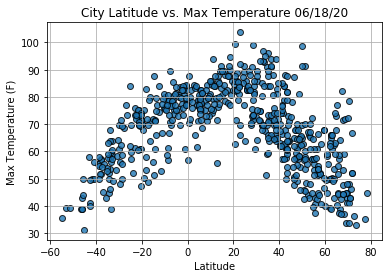

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
file_name = os.path.join(".", "weather_data", "Fig1.png")
plt.savefig(file_name)

# Show plot.
plt.show()

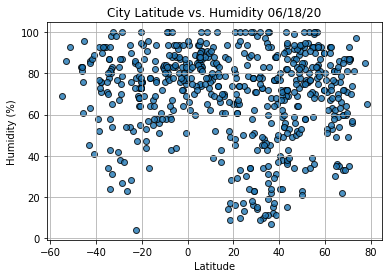

In [16]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
file_name = os.path.join(".", "weather_data", "Fig2.png")
plt.savefig(file_name)

# Show plot.
plt.show()

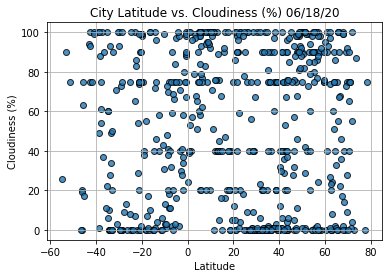

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
file_name = os.path.join(".", "weather_data", "Fig3.png")
plt.savefig(file_name)
# Show plot.
plt.show()

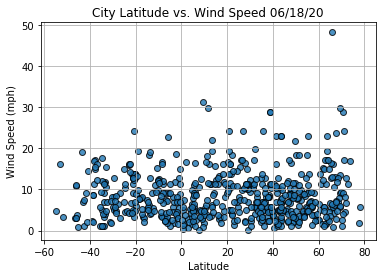

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
file_name = os.path.join(".", "weather_data", "Fig4.png")
plt.savefig(file_name)
# Show plot.
plt.show()

In [19]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    print(f"r-value:{r_value}")
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                      Tepulco
Country                        MX
Date          2020-06-18 21:00:09
Lat                         19.12
Lng                        -97.98
Max Temp                     80.6
Humidity                       28
Cloudiness                     40
Wind Speed                   8.05
Name: 13, dtype: object

In [21]:
city_data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        598 non-null    object 
 1   Country     598 non-null    object 
 2   Date        598 non-null    object 
 3   Lat         598 non-null    float64
 4   Lng         598 non-null    float64
 5   Max Temp    598 non-null    float64
 6   Humidity    598 non-null    int64  
 7   Cloudiness  598 non-null    int64  
 8   Wind Speed  598 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 42.2+ KB


In [22]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ilulissat,GL,2020-06-18 20:58:55,69.22,-51.10,33.80,64,90,5.82
1,Busselton,AU,2020-06-18 20:56:02,-33.65,115.33,39.00,98,49,3.18
2,Lichuan,CN,2020-06-18 21:00:07,30.30,108.85,64.06,98,100,2.37
3,Carnarvon,AU,2020-06-18 20:57:36,-24.87,113.63,57.20,76,0,10.29
4,Calabozo,VE,2020-06-18 21:00:07,8.92,-67.43,79.57,88,100,3.02


In [23]:
city_data_df.index.name = 'City_ID'
city_data_df = city_data_df.reset_index()
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Ilulissat,GL,2020-06-18 20:58:55,69.22,-51.10,33.80,64,90,5.82
1,1,Busselton,AU,2020-06-18 20:56:02,-33.65,115.33,39.00,98,49,3.18
2,2,Lichuan,CN,2020-06-18 21:00:07,30.30,108.85,64.06,98,100,2.37
3,3,Carnarvon,AU,2020-06-18 20:57:36,-24.87,113.63,57.20,76,0,10.29
4,4,Calabozo,VE,2020-06-18 21:00:07,8.92,-67.43,79.57,88,100,3.02


In [24]:
index13 = city_data_df.loc[13]
index13

City_ID                        13
City                      Tepulco
Country                        MX
Date          2020-06-18 21:00:09
Lat                         19.12
Lng                        -97.98
Max Temp                     80.6
Humidity                       28
Cloudiness                     40
Wind Speed                   8.05
Name: 13, dtype: object

In [25]:
city_data_df['Lat'] >= 0

0       True
1      False
2       True
3      False
4       True
       ...  
593     True
594     True
595     True
596     True
597     True
Name: Lat, Length: 598, dtype: bool

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Ilulissat,GL,2020-06-18 20:58:55,69.22,-51.10,33.80,64,90,5.82
2,2,Lichuan,CN,2020-06-18 21:00:07,30.30,108.85,64.06,98,100,2.37
4,4,Calabozo,VE,2020-06-18 21:00:07,8.92,-67.43,79.57,88,100,3.02
7,7,Lamont,US,2020-06-18 20:58:25,35.26,-118.91,96.01,27,0,5.99
9,9,Kalabagh,PK,2020-06-18 21:00:08,32.97,71.56,96.96,10,0,8.25


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

r-value:-0.6854868153295434


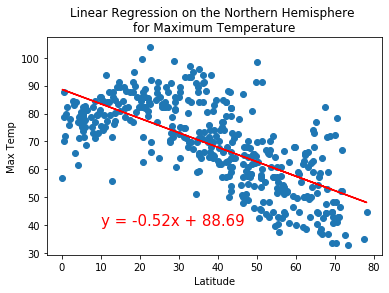

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 
                       'Max Temp',(10,40))

r-value:0.8037648371054237


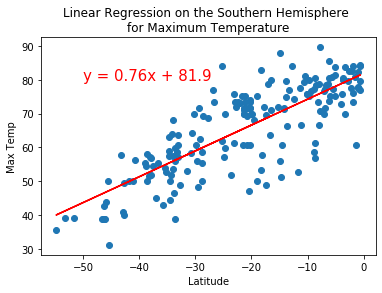

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 
                       'Max Temp',(-50, 80))

r-value:-0.03673062037756226


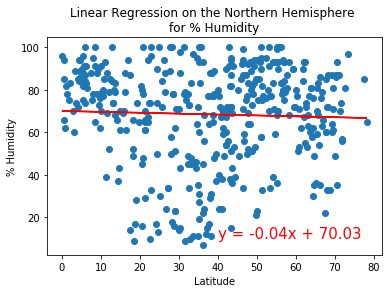

In [30]:
# Linear regression on the Northern Hemisphere humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Humidity', 
                       '% Humidity',(40,10))

r-value:0.07128434332147418


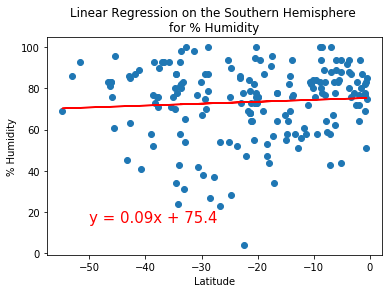

In [31]:
# Linear regression on the Southern Hemisphere humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

r-value:-0.08177922074229546


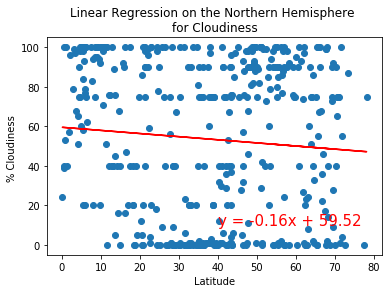

In [32]:
# Linear regression on the Northern Hemisphere cloudliness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor Cloudiness', 
                       '% Cloudiness ',(40,10))

r-value:0.01898025177730866


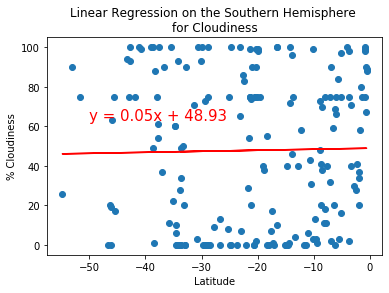

In [33]:
# Linear regression on the Southern Hemisphere Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Cloudiness', '% Cloudiness',(-50,63))

r-value:0.0679077965187033


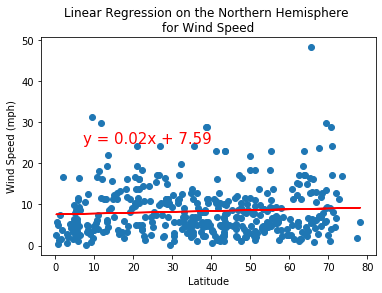

In [34]:
# Linear regression on the Northern Hemisphere Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed (mph)',(7,25))

r-value:-0.004489277408573936


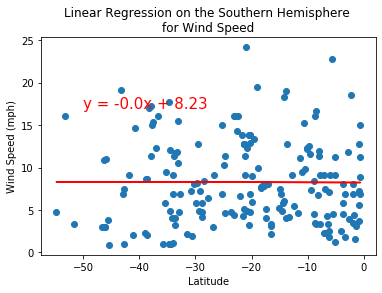

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed (mph)',(-50,17))